In [22]:
import cv2
import matplotlib.pyplot as plt

In [23]:
immagine = '01'

# Percorsi ai file
image_path = f"{immagine}.jpg"  # Sostituisci con il percorso dell'immagine
mask_path = f"{immagine}.png"  # Sostituisci con il percorso della maschera


In [24]:

# Funzione per visualizzare immagine e maschera affiancate
def display_side_by_side(image_path, mask_path):
    # Carica l'immagine e la maschera
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converti in RGB per Matplotlib
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Mostra l'immagine e la maschera affiancate
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Immagine Originale")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Maschera")
    plt.axis('off')

    plt.show()

# Funzione per sovrapporre immagine e maschera con trasparenza
def overlay_mask_on_image(image_path, mask_path, alpha=0.5, save=False):

    # Carica l'immagine e la maschera
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converti in RGB per Matplotlib
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Normalizza la maschera per adattarla al canale alpha
    normalized_mask = cv2.normalize(mask, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Crea un'immagine sovrapposta
    overlay = image.copy()
    overlay[normalized_mask > 0] = [0, 0, 255]  # Colore blu per la maschera
    blended = cv2.addWeighted(image, 1 - alpha, overlay, alpha, 0)

    # Mostra il risultato
    plt.figure(figsize=(10, 10))
    plt.imshow(blended)
    plt.title("Immagine con Maschera Sovrapposta")
    plt.axis('off')
    plt.show()

        # Salva il risultato
    save_path = image_path.replace(".jpg", "_sp.jpg")
    blended_bgr = cv2.cvtColor(blended, cv2.COLOR_RGB2BGR)  # Converti nuovamente in BGR per OpenCV
    cv2.imwrite(save_path, blended_bgr)

# Funzione per disegnare un quadrato sull'immagine
def draw_square_on_image(image_path, top_left, square_size=480, color=(255, 0, 0), thickness=2):
    # Carica l'immagine
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converti in RGB per Matplotlib

    # Calcola l'angolo inferiore destro del quadrato
    bottom_right = (top_left[0] + square_size, top_left[1] + square_size)

    # Disegna il quadrato
    cv2.rectangle(image, top_left, bottom_right, color, thickness)

    # Mostra l'immagine con il quadrato
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title("Immagine con Quadrato")
    plt.axis('off')
    plt.show()


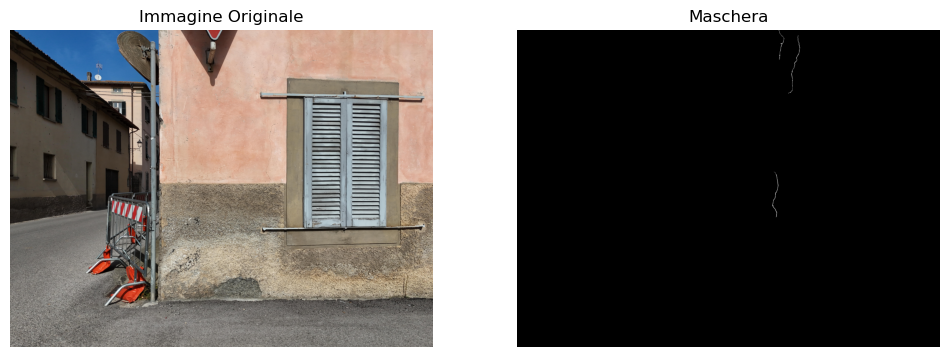

In [25]:

# Visualizza immagine e maschera affiancate
display_side_by_side(image_path, mask_path)


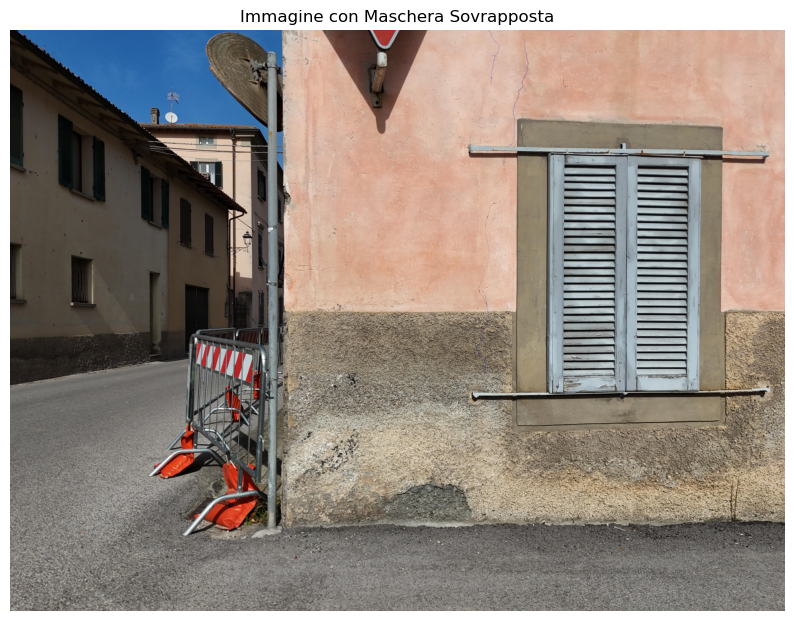

In [28]:

# Sovrapponi immagine e maschera con trasparenza (ad esempio, 50%)
overlay_mask_on_image(image_path, mask_path, alpha=0.2)


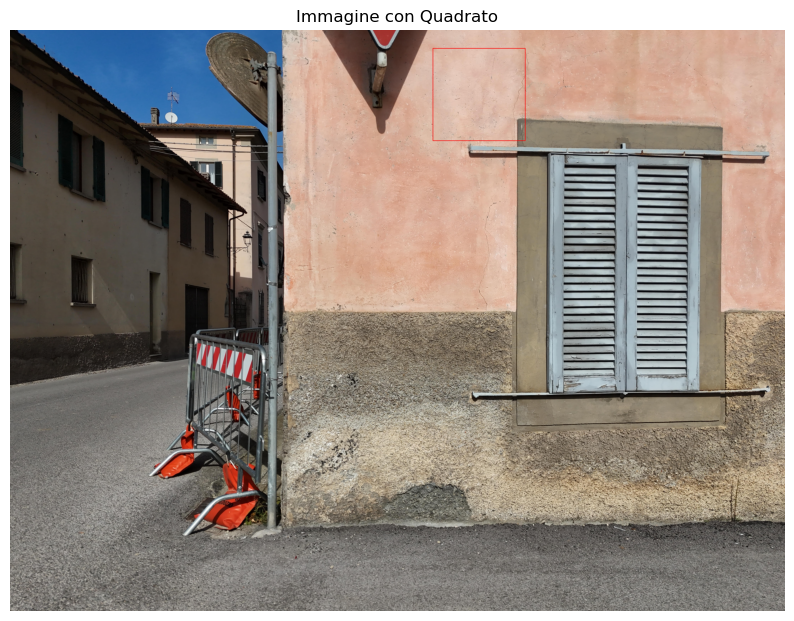

In [27]:
# Disegna un quadrato sull'immagine
draw_square_on_image(image_path, top_left=(2200, 100))